# Mini Lab

## Group Members
- Helene Barrera
- Feby Thomas
- John Olanipekun
- Justin Ehly

## <span style='color:blue'> Mini Lab Executive Summary </span>
* This exercise seeks to fit **logistic regression**  and **Support Vector Machine** models to our groups dataset: *Olist E-Commerce* dataset. 
* We will develop a base classifier that determines if a package is <span style='color:red'> **'late', 'on time' or 'early'**</span> and subsequently tune the hyperparameters for possible improvement to the performance metrics (i.e. Accuracy, Precision, F-Score and Sensitivity).
* This modeling phase will utilize the 'clean' dataset that was processed for the visualization task, but still needs some data preprocessing due to the transfer from one project to the next using a CSV file. 
* The **derived** response for the objective is actual delivery duration. Therefore the predictive model will predict actual delivery duration with performance measured on the held out test set. 

In [33]:
# set up environment
import numpy as np
import pandas as pd
import os
from datetime import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns


In [34]:
# change working directory
#os.chdir(r"C:\Users\olani\OneDrive\Documents\Data Science\SMU-Data Science\Machine Learning 1\Olist_Dataset")
#"C:\Users\olani\OneDrive\Documents\Data Science\SMU-Data Science\Machine Learning 1\Olist_Dataset"
#os.chdir(r"C:\Users\justi\GitHub\olist\python")
# get current working directory
#os.getcwd()

In [35]:
# change working directory
os.chdir(r"C:\Users\olani\OneDrive\Documents\Data Science\SMU-Data Science\Machine Learning 1\Lab 2_Classification")
#"C:\Users\olani\OneDrive\Documents\Data Science\SMU-Data Science\Machine Learning 1\Olist_Dataset"

# get current working directory
os.getcwd()

'C:\\Users\\olani\\OneDrive\\Documents\\Data Science\\SMU-Data Science\\Machine Learning 1\\Lab 2_Classification'

In [36]:
olist = pd.read_csv('olist_lab1_data.csv')
olist.head()

,order_id,customer_id,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,...,seller_state,tot_order_amt,purchase_wk_day,purchase_month,review_score_class,order_delivery_actual_duration,order_delivery_estimated_duration,delivery_estimate_discrepancy,product_dimensions,delivery_est_discrepancy_range
0,b81ef226f3fe1789b1e8b2acac839d17,0a8556ac6be836b46b3e89920d59291c,2018-04-25 22:01:49,2018-04-25 22:15:09,2018-05-02 15:20:00,2018-05-09 17:36:51,2018-05-22 00:00:00,708ab75d2a007f0564aedd11139c7708,39801,teofilo otoni,...,SP,99.33,Wednesday,April,bad,13,26,13,7803.0,too early
1,a9810da82917af2d9aefd1278f1dcfa0,f2c7fc58a9de810828715166c672f10a,2018-06-26 11:01:38,2018-06-26 11:18:58,2018-06-28 14:18:00,2018-06-29 20:32:09,2018-07-16 00:00:00,a8b9d3a27068454b1c98cc67d4e31e6f,2422,sao paulo,...,SP,24.39,Tuesday,June,good,3,19,16,1056.0,too early
2,25e8ea4e93396b6fa0d3dd708e76c1bd,25b14b69de0b6e184ae6fe2755e478f9,2017-12-12 11:19:55,2017-12-14 09:52:34,2017-12-15 20:13:22,2017-12-18 17:24:41,2018-01-04 00:00:00,6f70c0b2f7552832ba46eb57b1c5651e,2652,sao paulo,...,SP,65.71,Tuesday,December,good,4,20,16,3360.0,too early
3,ba78997921bbcdc1373bb41e913ab953,7a5d8efaaa1081f800628c30d2b0728f,2017-12-06 12:04:06,2017-12-06 12:13:20,2017-12-07 20:28:28,2017-12-21 01:35:51,2018-01-04 00:00:00,87695ed086ebd36f20404c82d20fca87,36060,juiz de fora,...,SP,107.78,Wednesday,December,good,14,28,14,3080.0,too early
4,ba78997921bbcdc1373bb41e913ab953,7a5d8efaaa1081f800628c30d2b0728f,2017-12-06 12:04:06,2017-12-06 12:13:20,2017-12-07 20:28:28,2017-12-21 01:35:51,2018-01-04 00:00:00,87695ed086ebd36f20404c82d20fca87,36060,juiz de fora,...,SP,107.78,Wednesday,December,good,14,28,14,3080.0,too early


In [37]:
olist.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114067 entries, 0 to 114066
Data columns (total 47 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   order_id                           114067 non-null  object 
 1   customer_id                        114067 non-null  object 
 2   order_purchase_timestamp           114067 non-null  object 
 3   order_approved_at                  114067 non-null  object 
 4   order_delivered_carrier_date       114067 non-null  object 
 5   order_delivered_customer_date      114067 non-null  object 
 6   order_estimated_delivery_date      114067 non-null  object 
 7   customer_unique_id                 114067 non-null  object 
 8   customer_zip_code_prefix           114067 non-null  int64  
 9   customer_city                      114067 non-null  object 
 10  customer_state                     114067 non-null  object 
 11  review_id                          1140

## <span style='color:blue'> **Data Preprocessing** </span>

* This exercise seeks to fit:
    - **Data Preparation** 'Olist_lab1_data.csv' (114067 instances and 47 attributes) will be prepared for the model.  
        - This dataset is the resulted from robust data preparation steps applied to the original raw dataset.
        - This was submitted at the deliverable for Lab 1.
        - As reminder, the original raw dataset was received in multiple files (10 files).
        - This files were merged using the attribute's unique key contraints as the case may be.  
        - In the current version of the dataset we will take care of the following:
            - re-label categorical levels with less than 500 observations as 'others'.
            - Beneficially, this will imply that the new columns generated by one hot encoding are actual contributing useful variance to the dataset.
            - It will improve class imbalance with respect to the affected attributes.
            - Suspect categorical attributes are Product categories and Customer city;
            - The resulting one-to-many effect of the join operation used to merge the dataset may have caused some instances to be duplicated when certain unique id attributes are dropped from the eventual dataset.
            - The duplicates in the final version of the dataset will be removed, chiefly because:
                - According to Schafer (2013, pp. 91), independence of observations is a key assumption that should be met before applying linear models to a dataset. Occurence of duplicates in our dataset can cause cluster effect which directly implies a lack of independence (e.g. Schafer 2013, pp. 91). 
               **Reference**: Ramsey Schafer, 2013: The Statistical Sleuth. 3rd Edition.       
    

In [38]:
#Create a working dataframe from the copy of original
import copy
olist_class = copy.deepcopy(olist)
olist_class.head()

,order_id,customer_id,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,...,seller_state,tot_order_amt,purchase_wk_day,purchase_month,review_score_class,order_delivery_actual_duration,order_delivery_estimated_duration,delivery_estimate_discrepancy,product_dimensions,delivery_est_discrepancy_range
0,b81ef226f3fe1789b1e8b2acac839d17,0a8556ac6be836b46b3e89920d59291c,2018-04-25 22:01:49,2018-04-25 22:15:09,2018-05-02 15:20:00,2018-05-09 17:36:51,2018-05-22 00:00:00,708ab75d2a007f0564aedd11139c7708,39801,teofilo otoni,...,SP,99.33,Wednesday,April,bad,13,26,13,7803.0,too early
1,a9810da82917af2d9aefd1278f1dcfa0,f2c7fc58a9de810828715166c672f10a,2018-06-26 11:01:38,2018-06-26 11:18:58,2018-06-28 14:18:00,2018-06-29 20:32:09,2018-07-16 00:00:00,a8b9d3a27068454b1c98cc67d4e31e6f,2422,sao paulo,...,SP,24.39,Tuesday,June,good,3,19,16,1056.0,too early
2,25e8ea4e93396b6fa0d3dd708e76c1bd,25b14b69de0b6e184ae6fe2755e478f9,2017-12-12 11:19:55,2017-12-14 09:52:34,2017-12-15 20:13:22,2017-12-18 17:24:41,2018-01-04 00:00:00,6f70c0b2f7552832ba46eb57b1c5651e,2652,sao paulo,...,SP,65.71,Tuesday,December,good,4,20,16,3360.0,too early
3,ba78997921bbcdc1373bb41e913ab953,7a5d8efaaa1081f800628c30d2b0728f,2017-12-06 12:04:06,2017-12-06 12:13:20,2017-12-07 20:28:28,2017-12-21 01:35:51,2018-01-04 00:00:00,87695ed086ebd36f20404c82d20fca87,36060,juiz de fora,...,SP,107.78,Wednesday,December,good,14,28,14,3080.0,too early
4,ba78997921bbcdc1373bb41e913ab953,7a5d8efaaa1081f800628c30d2b0728f,2017-12-06 12:04:06,2017-12-06 12:13:20,2017-12-07 20:28:28,2017-12-21 01:35:51,2018-01-04 00:00:00,87695ed086ebd36f20404c82d20fca87,36060,juiz de fora,...,SP,107.78,Wednesday,December,good,14,28,14,3080.0,too early


In [39]:
#Modify datatypes
#changing attributes data types
continuous_features = ['price','freight_value', 'payment_sequential','payment_installments','payment_value',
                      'product_name_length','product_description_length', 'product_photos_qty','product_weight_g',
                      'product_length_cm','product_height_cm','product_width_cm', 'review_score',
                       'order_delivery_actual_duration', 'order_delivery_estimated_duration',
                       'delivery_estimate_discrepancy', 'product_dimensions', 'tot_order_amt'] 

cat_features = ['customer_city', 'customer_state', 'customer_zip_code_prefix', 'seller_zip_code_prefix', 
                'seller_city', 'seller_state', 'product_category_english','review_id',
               'review_comment_title','review_comment_message','payment_type',
               'order_item_id', 'product_id','seller_id','order_id', 'customer_id', 'purchase_wk_day', 'purchase_month',
               'delivery_est_discrepancy_range', 'review_score_class', 'customer_unique_id'] 

date_features = ['order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date',
                 'order_estimated_delivery_date', 'shipping_limit_date', 'review_creation_date', 'review_answer_timestamp'] 



In [40]:
# use the "astype" function to change the variable type
olist_class[continuous_features] = olist_class.copy()[continuous_features].astype(np.float64)
olist_class[cat_features] = olist_class.copy()[cat_features].astype("category")
#olist_class[date_features] = pd.to_datetime(olist_class.copy()[date_features])
olist_class.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114067 entries, 0 to 114066
Data columns (total 47 columns):
 #   Column                             Non-Null Count   Dtype   
---  ------                             --------------   -----   
 0   order_id                           114067 non-null  category
 1   customer_id                        114067 non-null  category
 2   order_purchase_timestamp           114067 non-null  object  
 3   order_approved_at                  114067 non-null  object  
 4   order_delivered_carrier_date       114067 non-null  object  
 5   order_delivered_customer_date      114067 non-null  object  
 6   order_estimated_delivery_date      114067 non-null  object  
 7   customer_unique_id                 114067 non-null  category
 8   customer_zip_code_prefix           114067 non-null  category
 9   customer_city                      114067 non-null  category
 10  customer_state                     114067 non-null  category
 11  review_id                 

In [41]:
# fix dates
for i in date_features:
    olist_class.loc[:,i] = pd.to_datetime(olist_class.copy().loc[:,i], errors="coerce")

In [42]:
olist_class.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114067 entries, 0 to 114066
Data columns (total 47 columns):
 #   Column                             Non-Null Count   Dtype         
---  ------                             --------------   -----         
 0   order_id                           114067 non-null  category      
 1   customer_id                        114067 non-null  category      
 2   order_purchase_timestamp           114067 non-null  datetime64[ns]
 3   order_approved_at                  114067 non-null  datetime64[ns]
 4   order_delivered_carrier_date       114067 non-null  datetime64[ns]
 5   order_delivered_customer_date      114067 non-null  datetime64[ns]
 6   order_estimated_delivery_date      114067 non-null  datetime64[ns]
 7   customer_unique_id                 114067 non-null  category      
 8   customer_zip_code_prefix           114067 non-null  category      
 9   customer_city                      114067 non-null  category      
 10  customer_state      

Text(0.5, 1.0, 'Distribution of Discrepancy')

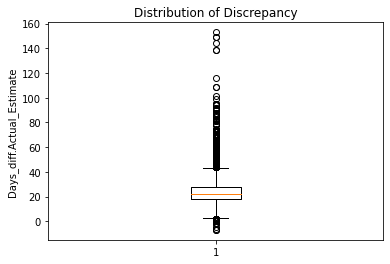

In [43]:
plt.boxplot(x=olist.order_delivery_estimated_duration)
plt.ylabel('Days_diff.Actual_Estimate')
plt.title('Distribution of Discrepancy') #labels

In [44]:
olist.copy()['order_delivery_estimated_duration'].quantile(0.95)

38.0

In [45]:
estimate_delivery = []
estimate_delivery_out = []

thresh = np.quantile(olist.copy()['order_delivery_estimated_duration'], 0.95)
[estimate_delivery.append(i)
 if abs(i) <= thresh else estimate_delivery_out.append(i)
 for i in olist.copy()['order_delivery_estimated_duration']]
#y = np.array(y)

len(estimate_delivery), len(estimate_delivery_out), (len(estimate_delivery)/olist.shape[0])


(108875, 5192, 0.9544828916338643)

Text(0.5, 1.0, 'Distribution of Discrepancy')

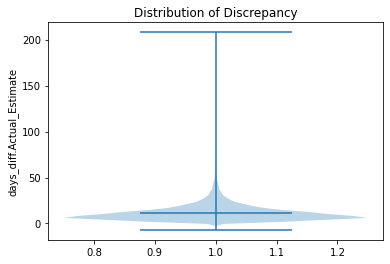

In [46]:
plt.violinplot(olist.order_delivery_actual_duration, showmeans=True)
plt.ylabel('days_diff.Actual_Estimate')
plt.title('Distribution of Discrepancy') #labels

### <span style='color:blue'> Subset the dataset </span>

Using an intuitive approach to what might cause a package to be categorized as delivered early, on time or late we subset the preprocessed dataset. This also will allow us more flexibility in running multiple iterations of our classifiers to determine the most efficient runing parameters.

In [47]:
olist_class2 = olist_class[['payment_sequential', 'product_category_english', 
                            'seller_zip_code_prefix','seller_city', 'tot_order_amt', 
                            'freight_value', 'product_dimensions', 'review_score_class', 'product_weight_g', 'customer_city',
                            'customer_zip_code_prefix','order_approved_at', 'delivery_estimate_discrepancy']]
olist_class2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114067 entries, 0 to 114066
Data columns (total 13 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   payment_sequential             114067 non-null  float64       
 1   product_category_english       114067 non-null  category      
 2   seller_zip_code_prefix         114067 non-null  category      
 3   seller_city                    114067 non-null  category      
 4   tot_order_amt                  114067 non-null  float64       
 5   freight_value                  114067 non-null  float64       
 6   product_dimensions             114066 non-null  float64       
 7   review_score_class             114067 non-null  category      
 8   product_weight_g               114066 non-null  float64       
 9   customer_city                  114067 non-null  category      
 10  customer_zip_code_prefix       114067 non-null  category      
 11  

In [48]:
olist_class2.dropna(inplace=True)

C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [49]:
olist_class2.shape, olist_class2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 114066 entries, 0 to 114066
Data columns (total 13 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   payment_sequential             114066 non-null  float64       
 1   product_category_english       114066 non-null  category      
 2   seller_zip_code_prefix         114066 non-null  category      
 3   seller_city                    114066 non-null  category      
 4   tot_order_amt                  114066 non-null  float64       
 5   freight_value                  114066 non-null  float64       
 6   product_dimensions             114066 non-null  float64       
 7   review_score_class             114066 non-null  category      
 8   product_weight_g               114066 non-null  float64       
 9   customer_city                  114066 non-null  category      
 10  customer_zip_code_prefix       114066 non-null  category      
 11  

((114066, 13), None)

In [50]:
#olist_class2.loc[olist_class2.order_delivery_actual_duration > 50, ('order_delivery_actual_duration')]= np.NaN
olist_class2.head()

,payment_sequential,product_category_english,seller_zip_code_prefix,seller_city,tot_order_amt,freight_value,product_dimensions,review_score_class,product_weight_g,customer_city,customer_zip_code_prefix,order_approved_at,delivery_estimate_discrepancy
0,1.0,home_construction,13321.0,salto,99.33,19.53,7803.0,bad,800.0,teofilo otoni,39801,2018-04-25 22:15:09,13.0
1,1.0,auto,4660.0,sao paulo,24.39,7.39,1056.0,good,150.0,sao paulo,2422,2018-06-26 11:18:58,16.0
2,1.0,perfumery,9015.0,santo andre,65.71,8.72,3360.0,good,250.0,sao paulo,2652,2017-12-14 09:52:34,16.0
3,1.0,bed_bath_table,13405.0,piracicaba,107.78,17.88,3080.0,good,1200.0,juiz de fora,36060,2017-12-06 12:13:20,14.0
4,1.0,bed_bath_table,13405.0,piracicaba,107.78,17.88,3080.0,good,1200.0,juiz de fora,36060,2017-12-06 12:13:20,14.0


In [51]:
for i in olist_class2:
    print('Unique value counts for ' + i + ' attribute is: =', olist_class2[i].nunique())

Unique value counts for payment_sequential attribute is: = 26
Unique value counts for product_category_english attribute is: = 73
Unique value counts for seller_zip_code_prefix attribute is: = 2136
Unique value counts for seller_city attribute is: = 588
Unique value counts for tot_order_amt attribute is: = 26460
Unique value counts for freight_value attribute is: = 6902
Unique value counts for product_dimensions attribute is: = 4416
Unique value counts for review_score_class attribute is: = 3
Unique value counts for product_weight_g attribute is: = 2167
Unique value counts for customer_city attribute is: = 4073
Unique value counts for customer_zip_code_prefix attribute is: = 14844
Unique value counts for order_approved_at attribute is: = 87124
Unique value counts for delivery_estimate_discrepancy attribute is: = 197


In [52]:
#Check point
olist_class3 = copy.deepcopy(olist_class2)

In [53]:
olist_class3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 114066 entries, 0 to 114066
Data columns (total 13 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   payment_sequential             114066 non-null  float64       
 1   product_category_english       114066 non-null  category      
 2   seller_zip_code_prefix         114066 non-null  category      
 3   seller_city                    114066 non-null  category      
 4   tot_order_amt                  114066 non-null  float64       
 5   freight_value                  114066 non-null  float64       
 6   product_dimensions             114066 non-null  float64       
 7   review_score_class             114066 non-null  category      
 8   product_weight_g               114066 non-null  float64       
 9   customer_city                  114066 non-null  category      
 10  customer_zip_code_prefix       114066 non-null  category      
 11  

**collapse less frequent categorical levels to 'others'
- For each specified column, it applies the value_counts(). It maps the condition to the column values
- the mask is used to check that condition if it is false in any value it assigns 'others'

In [54]:
#The map and mask method did not work when the attribute was in categorical. 
#But worked when I revert the category to 'object'
olist_class3['product_category_english'] = olist_class3.copy()['product_category_english'].astype("object")

- Source of this re-labeling aproach below was a personal communication with Sean O'Donnell (practicing Data Scientist):  
- Babatunde John Olanipekun  

In [55]:
#replace instances that are less than 500 with 'other product category'
_ = olist_class3.product_category_english.map(olist_class3.product_category_english.value_counts()) < 500
olist_class3.product_category_english =  olist_class3.product_category_english.mask(_, 'other_product_category')

In [56]:
olist_class3['customer_city'] = olist_class3.copy()['customer_city'].astype("object")
_ = olist_class3.customer_city.map(olist_class3.customer_city.value_counts()) < 300
olist_class3.customer_city =  olist_class3.customer_city.mask(_, 'other_city')

In [58]:
#How many levels do we now have in comparison with the previous version?
olist_class3.product_category_english.nunique(), olist_class.product_category_english.nunique()

(30, 73)

In [59]:
#How many levels do we now have in comparison with the previous version?
olist_class3.customer_city.nunique(), olist_class.customer_city.nunique()

(51, 4073)

In [60]:
olist_class3['product_category_english'] = olist_class3.copy()['product_category_english'].astype("category")
olist_class3['customer_city'] = olist_class3.copy()['customer_city'].astype("category")

In [61]:
olist_class3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 114066 entries, 0 to 114066
Data columns (total 13 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   payment_sequential             114066 non-null  float64       
 1   product_category_english       114066 non-null  category      
 2   seller_zip_code_prefix         114066 non-null  category      
 3   seller_city                    114066 non-null  category      
 4   tot_order_amt                  114066 non-null  float64       
 5   freight_value                  114066 non-null  float64       
 6   product_dimensions             114066 non-null  float64       
 7   review_score_class             114066 non-null  category      
 8   product_weight_g               114066 non-null  float64       
 9   customer_city                  114066 non-null  category      
 10  customer_zip_code_prefix       114066 non-null  category      
 11  

**Order approved at***
- This is currently in date format and it is not adding much in its current format
- We extracted the 'hour' of day from the timestamp created a column for it as an integar

**Hour Extraction**
- Round off the approved_at time datatype to nearest hour. 
    - e.g.: 9.52 = 10.00, 11:18 = 11:00
- Then extract the rounded off hour from the full timestamp
- Following successful extraction, we change the resulting object datatype to integar datatype
- Unused columns will be dropped afterwards

In [ ]:
#create a new column for the hour of day of the order
olist_model3['order_approved_time'] = olist_model3['order_approved_at'].round('H')

#Extract the hour from from the newly created time
olist_model3['order_approved_hour'] = olist_model3['order_approved_time2'].dt.strftime('%H')

olist_model3['order_approved_hour'] = olist_model3['order_approved_hour'].astype("int32")

In [ ]:
#Remove columns that are recoded.
olist_model3.drop(columns=['order_approved_time', 'order_approved_at'
                          ], inplace =True) #it is safe to use inplace=True since this is a copy of the dataset.

In [62]:
#review class is an important attribut 
#but with class imbalance so we split the dataset 
#to ensure that samples are representatinve of the class levels
olist_class2['review_score_class'].value_counts()

good    87129
bad     17295
fair     9642
Name: review_score_class, dtype: int64

In [63]:
olist_class2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 114066 entries, 0 to 114066
Data columns (total 13 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   payment_sequential             114066 non-null  float64       
 1   product_category_english       114066 non-null  category      
 2   seller_zip_code_prefix         114066 non-null  category      
 3   seller_city                    114066 non-null  category      
 4   tot_order_amt                  114066 non-null  float64       
 5   freight_value                  114066 non-null  float64       
 6   product_dimensions             114066 non-null  float64       
 7   review_score_class             114066 non-null  category      
 8   product_weight_g               114066 non-null  float64       
 9   customer_city                  114066 non-null  category      
 10  customer_zip_code_prefix       114066 non-null  category      
 11  

In [76]:
from sklearn.datasets import make_regression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeRegressor
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Perceptron
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import SGDRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot

In [ ]:
#olist_class2 = olist_class2.sample(n=12000)

### <span style='color:blue'> === 80:20 Train:Test Split of the dataset === </span>

In [64]:
#Simple train test split

from sklearn.model_selection import train_test_split
olist_train, olist_test = train_test_split(olist_class3, test_size=0.2,random_state=100, 
                                           stratify = olist_class3.review_score_class)
#train_indicies = olist_train.index.values.copy()


In [65]:
olist_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 91252 entries, 92459 to 71138
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   payment_sequential             91252 non-null  float64       
 1   product_category_english       91252 non-null  category      
 2   seller_zip_code_prefix         91252 non-null  category      
 3   seller_city                    91252 non-null  category      
 4   tot_order_amt                  91252 non-null  float64       
 5   freight_value                  91252 non-null  float64       
 6   product_dimensions             91252 non-null  float64       
 7   review_score_class             91252 non-null  category      
 8   product_weight_g               91252 non-null  float64       
 9   customer_city                  91252 non-null  category      
 10  customer_zip_code_prefix       91252 non-null  category      
 11  order_appro

In [66]:
olist_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22814 entries, 107119 to 27386
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   payment_sequential             22814 non-null  float64       
 1   product_category_english       22814 non-null  category      
 2   seller_zip_code_prefix         22814 non-null  category      
 3   seller_city                    22814 non-null  category      
 4   tot_order_amt                  22814 non-null  float64       
 5   freight_value                  22814 non-null  float64       
 6   product_dimensions             22814 non-null  float64       
 7   review_score_class             22814 non-null  category      
 8   product_weight_g               22814 non-null  float64       
 9   customer_city                  22814 non-null  category      
 10  customer_zip_code_prefix       22814 non-null  category      
 11  order_appr

In [67]:
#Target variable
olist_train_y = olist_train.delivery_estimate_discrepancy
len(olist_train_y)

91252

In [68]:
#All predictor attributes
olist_train_noY = olist_train.copy().drop('delivery_estimate_discrepancy', axis=1)
olist_train_noY.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 91252 entries, 92459 to 71138
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   payment_sequential        91252 non-null  float64       
 1   product_category_english  91252 non-null  category      
 2   seller_zip_code_prefix    91252 non-null  category      
 3   seller_city               91252 non-null  category      
 4   tot_order_amt             91252 non-null  float64       
 5   freight_value             91252 non-null  float64       
 6   product_dimensions        91252 non-null  float64       
 7   review_score_class        91252 non-null  category      
 8   product_weight_g          91252 non-null  float64       
 9   customer_city             91252 non-null  category      
 10  customer_zip_code_prefix  91252 non-null  category      
 11  order_approved_at         91252 non-null  datetime64[ns]
dtypes: category(6)

### Preprocess the test for prediction

In [69]:
#Target variable
olist_test_y = olist_test.delivery_estimate_discrepancy
len(olist_test_y)

22814

In [70]:
#All predictor attributes
olist_test_noY = olist_test.copy().drop('delivery_estimate_discrepancy', axis=1)
olist_test_noY.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22814 entries, 107119 to 27386
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   payment_sequential        22814 non-null  float64       
 1   product_category_english  22814 non-null  category      
 2   seller_zip_code_prefix    22814 non-null  category      
 3   seller_city               22814 non-null  category      
 4   tot_order_amt             22814 non-null  float64       
 5   freight_value             22814 non-null  float64       
 6   product_dimensions        22814 non-null  float64       
 7   review_score_class        22814 non-null  category      
 8   product_weight_g          22814 non-null  float64       
 9   customer_city             22814 non-null  category      
 10  customer_zip_code_prefix  22814 non-null  category      
 11  order_approved_at         22814 non-null  datetime64[ns]
dtypes: category(6

In [71]:
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.pipeline import make_pipeline
import multiprocessing
from sklearn.impute import SimpleImputer

In [ ]:
#Categorical variables
olist_train_cat = olist_train_noY[['payment_sequential', 'product_category_english', 
                            'seller_zip_code_prefix','seller_city', 'review_score_class', 'customer_city',
                            'customer_zip_code_prefix']]
olist_train_cat.info()

In [ ]:
olist_train_num = olist_train_noY[['tot_order_amt', 'freight_value', 'product_dimensions', 'product_weight_g', 'order_approved_hour']]

In [ ]:
#Categorical variables
olist_test_cat = olist_test_noY[['payment_sequential', 'product_category_english', 
                            'seller_zip_code_prefix','seller_city', 'review_score_class', 'customer_city',
                            'customer_zip_code_prefix']]
olist_test_cat.info()

In [ ]:
olist_test_num = olist_test_noY[['tot_order_amt', 'freight_value', 'product_dimensions', 'product_weight_g', 'order_approved_hour']]

In [80]:
numeric_pipeline = make_pipeline(StandardScaler()) 

In [81]:
fullpipeline_simple = ColumnTransformer(transformers=\
                                       [('numeric_pipeline', numeric_pipeline, select_numeric_features),\
                                        ('oh_pipeline', oh_pipeline1, select_oh_features),\
                                        ('hc_pipeline', oh_pipeline1, select_hc_features)],                                       
                                       remainder='drop')

In [ ]:
# let's break up the Discrepancy variable
#But needs outliers to be removed
#olist_train_y_class = pd.cut(olist_train_y, [0, 2, 3, 5], 3, labels=['bad','fair','good']) # this creates a new variable
#olist_train_y_class = olist_train_y_class.astype("category")

In [82]:
olist_train_y.describe()

count    91252.000000
mean        11.422270
std         10.156696
min       -189.000000
25%          7.000000
50%         12.000000
75%         16.000000
max        146.000000
Name: delivery_estimate_discrepancy, dtype: float64

In [83]:
olist_train_y.quantile(0.95)

26.0

{'bodies': [<matplotlib.collections.PolyCollection at 0x200ecb7dfc8>],
 'cmeans': <matplotlib.collections.LineCollection at 0x200ecba5688>,
 'cmaxes': <matplotlib.collections.LineCollection at 0x200ecbb2e08>,
 'cmins': <matplotlib.collections.LineCollection at 0x200ecbb2688>,
 'cbars': <matplotlib.collections.LineCollection at 0x200ecbbbd48>}

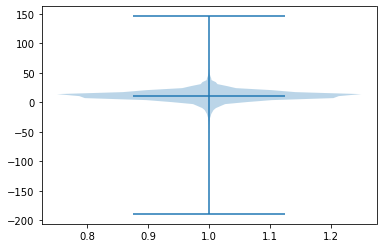

In [84]:
plt.violinplot(olist_train_y, showmeans=True)

#### <span style='color:blue'>Create the categorical y training variable of customer reviews to be either 'late' = 1,'on time' = 2, 'early' = 3</span>

In [85]:
olist_train_y_range = pd.cut(olist_train_y, [-200, -2, 2, 210], 3, labels=[1,2,3]) # this creates a new variable
olist_train_y_range.describe()
#'late' = 1,'on target' = 2, 'early' = 3

count     91252
unique        3
top           3
freq      80352
Name: delivery_estimate_discrepancy, dtype: int64

In [86]:
#Sanity check for any null values as a result of the cut process.
olist_train_y_range.value_counts()

3    80352
1     5624
2     5276
Name: delivery_estimate_discrepancy, dtype: int64

---
#### <span style='color:blue'>Create the categorical y test variable of customer reviews to be either 'late' = 1,'on time' = 2, 'early' = 3</span>

In [87]:
olist_test_y_range = pd.cut(olist_test_y, [-200, -2, 2, 250], 3, labels=[1,2,3]) # this creates a new variable
olist_test_y_range.describe()
#'late' = 1,'on target' = 2, 'early' = 3

count     22814
unique        3
top           3
freq      20043
Name: delivery_estimate_discrepancy, dtype: int64

In [88]:
olist_test_y_range.isna().sum()

0

In [89]:
#Sanity check for any null values as a result of the cut process.
olist_test_y_range.value_counts()

3    20043
1     1448
2     1323
Name: delivery_estimate_discrepancy, dtype: int64

### Normalize the feature values so that all the attributes are on the same dynamic range


In [90]:
#Make Y classification
X_train_class = fullpipeline_simple.fit_transform(olist_train_noY, olist_train_y_range)
X_test_class = fullpipeline_simple.transform(olist_test_noY)

In [91]:
print(X_train_class.shape)
print(X_test_class.shape)

(91252, 16979)
(22814, 16979)


---
# <span style='color:blue'> **1. Create Model (50 points)** </span>
---

- Create a **logistic regression model** and a **support vector machine model** for the **classification task** involved with your dataset.  

- Assess how well each model performs (use 80/20 training/testing split for your data).
    - <span style='color:green'> ***80/20 Split performed during preprocessing above***</span>

- Adjust parameters of the models to make them more accurate. If your dataset size requires the use of stochastic gradient descent, then linear kernel only is fine to use. 
    - That is, the SGDClassifier is fine to use for optimizing logistic regression and linear support vector machines.
            -For many problems, SGD will be required in order to train the SVM model in a reasonable timeframe.

## <span style='color:blue'> Create a Logistic Regression classifier </span>


In [92]:
%%time
from sklearn.metrics import classification_report

#Logistic regression
logr_clf = LogisticRegression(penalty='l2', #default
                              C=1, #default 
                              class_weight='balanced', # use with imbalanced dataset
                              solver='newton-cg', # only solver that works with this dataset
                              multi_class='multinomial', 
                              random_state=42) 
logr_clf.fit(X_train_class,olist_train_y_range)

# Note: For multiclass problems, only ‘newton-cg’, ‘sag’, ‘saga’ and ‘lbfgs’ handle multinomial loss; 
# ‘liblinear’ is limited to one-versus-rest schemes.
# Note: solver default lbfgs, sag and saga did not work, we hit max_iter and even set at 4000 it still did not work
# Note: only newton-cg works

#y_train_pred_class = sgd_clf.predict(X_train_class)
yhat_lr = logr_clf.predict(X_test_class)

print('Logistic Regression Metrics:')
print(logr_clf)
print(classification_report(olist_test_y_range, yhat_lr))

Logistic Regression Metrics:
LogisticRegression(C=1, class_weight='balanced', multi_class='multinomial',
                   random_state=42, solver='newton-cg')
              precision    recall  f1-score   support

           1       0.27      0.65      0.38      1448
           2       0.12      0.41      0.19      1323
           3       0.94      0.69      0.80     20043

    accuracy                           0.67     22814
   macro avg       0.44      0.58      0.45     22814
weighted avg       0.85      0.67      0.74     22814

Wall time: 29.2 s


## <span style='color:blue'>Utilize RandomizedSearchCV to tune our Logistic Regression Model</span>

source: https://chrisalbon.com/machine_learning/model_selection/hyperparameter_tuning_using_random_search/

In [93]:
%%time
from scipy.stats import uniform
from sklearn.model_selection import RandomizedSearchCV
X = X_train_class
y = olist_train_y_range
# create logistic Regression
lgr = LogisticRegression(solver='newton-cg')

# create regularization penalty space
penalty = ['l2','none']  #only penalties that work with newton-cg

# create regulatization hyperparameter distribution using uniform distribution
C = uniform(loc=0, scale=4) 

# create hyperparameter options
hyp = dict(C=C, penalty=penalty)

# create random search, 5fold CV, 100 iterations
clf = RandomizedSearchCV(lgr, hyp, random_state=42, n_iter=10, cv=5, verbose=0, n_jobs=-1)



Wall time: 1.99 ms


In [ ]:
%%time
#fit random search
best_model = clf.fit(X,y)

In [ ]:
# view hyperparameter values of best model
print('Best Penalty:', best_model.best_estimator_.get_params()['penalty'])
print('Best C:', best_model.best_estimator_.get_params()['C'])
print('Best Score: ', best_model.best_score_) 
print('Best Params: ', best_model.best_params_)
print('Best Time (seconds): ', best_model.refit_time_)

In [ ]:
# predict using best model
yhat = best_model.predict(X_test_class)

print('Best RandomSearchCV Logistic Regression Metrics:')
print(classification_report(olist_test_y_range, yhat, zero_division=0))

## <span style='color:blue'> Basic SVM Model</span>

In [ ]:
%%time
# Basic SVM Model

from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train_class, olist_train_y_range)

#y_train_pred_class = sgd_clf.predict(X_train_class)
yhat_svm = sgd_clf.predict(X_test_class)

In [ ]:
# SVM with SD Metrics
print('Logistic Regression Metrics:')
print(sgd_clf)
print(classification_report(olist_test_y_range, yhat_svm, zero_division=0))

## <span style='color:blue'>Utilize RandomizedSearchCV to tune our SVM Model</span>

In [ ]:
%%time
from sklearn.linear_model import SGDClassifier 
from sklearn.model_selection import RandomizedSearchCV 

# create variable dictionaries
loss = ['hinge', 'log', 'modified_huber', 'squared_hinge']
penalty = ['l1', 'l2', 'elasticnet'] 
alpha = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000] 
learning_rate = ['constant', 'optimal', 'invscaling', 'adaptive'] 
eta0 = [1, 10, 100] 

# create hyperparameter options
param_distributions = dict(loss=loss, 
                           penalty=penalty, 
                           alpha=alpha, 
                           learning_rate=learning_rate, 
                           eta0=eta0)

# create the classifier
sgd = SGDClassifier(early_stopping=True, validation_fraction=0.15, max_iter=100, class_weight = "balanced") 

# create RandomizedSearchCV
random = RandomizedSearchCV(estimator=sgd,
                            param_distributions=param_distributions, 
                            verbose=1, 
                            n_iter=100, 
                            n_jobs=-1) 
random_result = random.fit(X_train_class,olist_train_y_range) 

In [ ]:
%%time
# Print Best Results
print('Best Score: ', random_result.best_score_) 
print('Best Params: ', random_result.best_params_)
print('Best Time (seconds): ', random_result.refit_time_)

In [ ]:
%%time
# predict using best model
yhat_rand_svm = random_result.predict(X_test_class)

print('Best Random SVM SD Metrics:')
print(classification_report(olist_test_y_range, yhat_rand_svm, zero_division=0))

## <span style='color:blue'> Model Advantages (10 points) </span>
Discuss the advantages of each model for each classification task. Does one type of model offer superior performance over another in terms of prediction accuracy? In terms of training time or efficiency? Explain in detail.

**Discussion:**
* In order to save time, we sampled 12,000 of our original 114,066 records.
* We utilized and 80/20 test-train split
* We used intuitive feature reduction prior to training the model to reduce computational resources and time and put some thought into what features would ideally contribute to a product arriving by it’s estimated arrival date. While it may seem intuitive to just assume comparing the estimated arrival date and the actual arrival date would suffice, we thought about how people perceive estimated delivery times from couriers. For example, if I can pay for a package to be overnighted from Dallas to Austin and pay a premium rate; however, I also know that generally I can just pay the ground shipping rate the and the package will show up with 1-2 days rather than the estimated 5-7 days, so that is why we wanted to really have features that contributed to determining if a package was truly late, on time or early.
* We ran 2 basic models using only minimal tuning for multinomial classification and 2 refitted models using RandomizedSearchCV for tuning.
* We used multinomial classification to classify if packages were late, on time or early to olist customers
* Basic Logistical Regression is the only model that was able to categorize deliveries that were made on-time (value #2) with a precision of 6%. It also had precision of 26% for late deliveries and 89% for early deliveries which makes sense since early deliveries had the largest representation in the dataset, followed by late deliveries and then on time deliveries. The overall precision was 75%. 
* Refitted using RandomizedSearchCV Logistical Regression: Once we tuned the model using RandomizedSearchCV with a 5-fold validation, the best model also correctly classifies on time deliveries 6% of the time, late deliveries 32% of the time and early deliveries 89% with and overall accuracy of 87%. So we saw some improvement with correctly categorizing the late deliveries and the overall accuracy.
 * SVM with Stochastic Descent with minor tuning to handle multinomial classification returned an overall accuracy of 87%, but failed to correctly classify any on time packages. This model had the same precision for late deliveries – 26% and early deliveries- 89%, but saw an increase in the recall for early deliveries, signaling an overfit at 98% with only 9% recall for late deliveries and no recall for on time deliveries. The overall accuracy was 87% and on par with the overall accuracy from the tuned logistal regression model (also at 87%).
* Reffited SVM with Stochastic Descent: we again utilized RandomizedSearchCV to tune our SVM with stochastic decent that  maintaining an overall accuracy of 86% that was slightly lower than the untraining SVM (87% accuracy) and the training logistical regression model (87%). The precision was better for categorizing late deliveries (30%) compared to the untrained SVM (26%), but lower than the training logistic regression model (32%); however, the recall for late deliveries classification was the highest for the trained SVM (17%) compared to the 2nd best recall for late deliveries (15%) from the untrained logistical regression model.
* Time - we found the best time for a model was the RandomizedSearchCV trained SVM at 0.06 seconds compared to 0.33 seconds for the best trained logistical regression model that also used RandomizedSearchCV. 




In [ ]:
print('\n================================================================\n')
print('=== Logistic Regression Metrics using minor tuning for class_weight, solver ===')
print(logr_clf)
print(classification_report(olist_test_y_range, yhat_lr))

print('\n================================================================\n')
print('=== Best RandomSearchCV Logistic Regression Metrics ===\n')
print('Best Penalty:', best_model.best_estimator_.get_params()['penalty'])
print('Best C:', best_model.best_estimator_.get_params()['C'])
print('Best Score: ', best_model.best_score_) 
print('Best Params: ', best_model.best_params_)
print('Best Time (seconds): ', best_model.refit_time_)
print(classification_report(olist_test_y_range, yhat, zero_division=0))

print('\n================================================================\n')
print('=== SVM with Stochastic Descent  Metrics ===\n')
print(classification_report(olist_test_y_range, yhat_svm, zero_division=0))

print('\n================================================================\n')
print('=== Best RandomSeachCV SVM-SD Metrics ===\n')
print('Best Score: ', random_result.best_score_) 
print('Best Params: ', random_result.best_params_)
print('Best Time (seconds): ', random_result.refit_time_)
print(classification_report(olist_test_y_range, yhat_rand_svm, zero_division=0))

### <span style='color:blue'> **Discssion** </span>


# <span style='color:blue'> 3. Interpret Feature Importance (30 points) </span>

- Use the weights from logistic regression to interpret the importance of different features for the classification task.
- Explain your interpretation in detail. Why do you think some variables are more important?
-<span style='color:blue'> We realized once we got to this point in the project that the weights can only be interpreted for binary classification because multinomial requires interpreting quite a bit of other statistical measures we aren't quite familiar with. We did make an attempt at several of them. </span>

#### Interpret the weights

- An odds ratio less than 1 indicates that the likelihood of an outcome occurring would decrease as the variable increases, while an odds ratio of greater than 1 would indicate that there is a greater likelihood of an outcome occurring as the variable increases.
 
- Unsurprisingly, the customer’s city had the largest impact on whether a customer receives their order early or late, given that the other variables in the model are held constant. We predicted this would be the case since certain areas of Brazil are extremely remote and difficult for carriers to deliver to. The odds of getting a package early given the customer’s city relative to other customers’ cities would be expected to decrease by a factor of 0.0053 for every increase of 1 when all other factors are held constant.  

- Order approved at is the time stamp when the payment was approved. It had the next highest weight, which is interesting since a time stamp shouldn’t necessarily be correlated to the length of time a package arrives before or after an estimated delivery date. It would be interesting if this is highly correlated due to large holidays of natural disasters that affect all packages ordered around a certain point in time. The odds of getting a package early given the order approved at increasing by 1 would be expected to decrease by a factor of 0.042, all other factors held constant.  

- The freight value had the third highest weight. This makes sense because a higher freight value could indicate a higher shipping priority, which would be highly correlated to the estimated delivery time and thus the delivery discrepancies. Unfortunately we don’t have data to confirm that this correlation is due to shipping priority, but we could possibly account for the package dimensions and weight to try to determine if higher cost freight value is dependent on the 3rd factor of shipping priority.  The odds of getting a package early given the freight value increasing by 1 would be expected to increase by a factor of 2.305, all other factors held constant.  

- It appears that review scores are not heavily correlated with the actual delivery duration, meaning customers may not have a preference for faster shipping, or may not necessarily post polarized reviews due to shipping. We would need to run a different test to determine whether reviews are correlated to the delivery discrepancy. 




In [ ]:
# iterate over the coefficients
weights = logr_clf.coef_.T # take transpose to make a column vector
variable_names = olist_train_noY.columns
for coef, name in zip(weights,variable_names):
    print(name, 'has weight of', coef[0])

In [ ]:
# iterate over the coefficients
weights = np.exp(logr_clf.coef_).T # take transpose to make a column vector
variable_names = olist_train_noY.columns
for coef, name in zip(weights,variable_names):
    print(name, 'has odds ratios of', coef[0])

In [ ]:
# now let's make a pandas Series with the names and values, and plot them
from matplotlib import pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline
# boxplot of continuous variables
fig, ax = plt.subplots(figsize=(10,5)) #creat plot area

plt.style.use('ggplot')

weights = pd.Series(logr_clf.coef_[0][0:12],index=olist_train_noY.columns)
ax = weights.plot(kind='bar')
ax.set_facecolor('white') # sets background to white
ax.set_xlabel('Features', fontsize='14') # x label
ax.set_ylabel('Weights', fontsize='14') # y label
ax.set_title('Features by Coef Weights', fontsize='14') # graph name
ax.grid(b=True,color='lightgrey')
plt.xticks(rotation=45, ha="right")


plt.show()

In [ ]:
#Correlations
# let's try a heatmap
# plot the correlation matrix using seaborn 
sns.set(style="darkgrid") # one of the many styles to plot using

cmap = sns.diverging_palette(210, 10, as_cmap=True) # one of the many color mappings

f, ax = plt.subplots(figsize=(10,10))

sns.heatmap(olist_class2.corr(), cmap=cmap, annot=True)
plt.yticks(rotation=0)
plt.xticks(rotation=45, ha="right")
plt.show()
print("Correlation heatmap that shows linear relationship between delivery_estimate_discrepancy and other numerical attributes in the Olist dataset.")

In [ ]:
# look at the support vectors
print(svc_clf.support_vectors_.shape)
print(svc_clf.support_.shape)
print(svc_clf.n_support_ )

In [ ]:
print(svc_clf.support_vectors_)

In [ ]:
olist_train.info()

# <span style='color:blue'> 4. Interpret support vectors </span>

- Look at the chosen support vectors for the classification task. 
- Do these provide any insight into the data? Explain. 
- If you used stochastic gradient descent (and therefore did not explicitly solve for support vectors), try subsampling your data to train the SVC model
    - then analyze the support vectors from the subsampled dataset.
    -- <span style='color:red'>We used stochastic gradient descent, but had issues trying to re-create the training dataframe and then add back in the categorical column for graphing</span>

In [ ]:
X = X_train_class
y = olist_train_y_range
X_test = X_test_class 
y_test = olist_test_y_range
X.shape

In [ ]:
# lets investigate SVMs on the data and play with the parameters and kernels
from sklearn.svm import SVC
from sklearn import metrics as mt

# train the model just as before
svm_clf = SVC(kernel="poly") # get object
svm_clf.fit(X, y)  # train object

y_hat = svm_clf.predict(X_test) # get test set precitions

acc = mt.accuracy_score(y_test,y_hat)
conf = mt.confusion_matrix(y_test,y_hat)
print('accuracy:', acc )
print(conf)

In [ ]:
# look at the support vectors
print(svm_clf.support_vectors_.shape)
print(svm_clf.support_.shape)
print(svm_clf.n_support_ )

In [ ]:
# lets investigate SVMs on the data and play with the parameters and kernels
from sklearn.svm import SVC
from sklearn import metrics as mt

# train the model just as before
svm_clf = SVC(kernel="linear") # get object
svm_clf.fit(X, y)  # train object

y_hat = svm_clf.predict(X_test) # get test set precitions

acc = mt.accuracy_score(y_test,y_hat)
conf = mt.confusion_matrix(y_test,y_hat)
print('accuracy:', acc )
print(conf)

In [ ]:
# look at the support vectors
print(svm_clf.support_vectors_.shape)
print(svm_clf.support_.shape)
print(svm_clf.n_support_ )

In [ ]:
train_indicies = sorted(train_indicies)
print(train_indicies)
print(olist_class2.index.shape)
#print(olist_class.iloc[70488])

In [ ]:
import numpy as np
# Now let's do some different analysis with the SVM and look at the instances that were chosen as support vectors

# now lets look at the support for the vectors and see if we they are indicative of anything
# grabe the rows that were selected as support vectors (these are usually instances that are hard to classify)

# make a dataframe of the training data
df_tested_on =  olist_class2.iloc[train_indices,:].copy() # saved from above, the indices chosen for training
# now get the support vectors from the trained model
df_support = df_tested_on.iloc[svm_clf.support_,:].copy()

df_support['delivery_estimate_discrepancy'] = y[svm_clf.support_] # add back in the 'Survived' Column to the pandas dataframe
X['delivery_estimate_discrepancy'] = y # also add it back in for the original data
df_support.info()